# 모델 학습 방법

## 점진적인 학습



### Stochastic Gradient Descent (SGD)
- 훈련 세트에서 랜덤하게 하나의 샘플을 골라서 가파른 경사를 조금씩 훈련
- 이때 훈련세트를 모두 사용하여 훈련하는 과정을 ephoch라고 부름
- SGD(랜덤하게 1개만 꺼내서 학습함) 외에도 미니배치 경사 하강법, 배치 경사 하강법(모두 꺼내서 학습함)이 존재함

참고) 손실함수 loss function
- 머신러닝 알고리즘이 얼마나 틀렸는지를 측정하는 기준
- loss값이 적어야 함. 즉, loss값이 적을때까지 SGD를 수행함


In [18]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish[['Species']].to_numpy()

In [20]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_Y, test_Y = train_test_split(fish_input, fish_target, random_state=42)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_X)

train_scaled_X = ss.transform(train_X)
test_scaled_X = ss.transform(test_X)

In [21]:
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled_X, train_Y)

print("train's score= ", sc.score(train_scaled_X, train_Y))
print("test's score= ", sc.score(test_scaled_X, test_Y))

# 기존 훈련된 모델에 추가로 훈련 시키기 (연속해서)
sc.partial_fit(train_scaled_X, train_Y)
print("train the sc model a little more")
print("train's score= ", sc.score(train_scaled_X, train_Y))
print("test's score= ", sc.score(test_scaled_X, test_Y))


train's score=  0.773109243697479
test's score=  0.775
train the sc model a little more
train's score=  0.8151260504201681
test's score=  0.825


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### epoch, 과대/과소 적합
- 모델이 과대적합이 시작하기 전에 훈련을 멈추는 것을 early stopping 이라고 함

In [24]:
import numpy as np
sc = SGDClassifier(loss='log', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

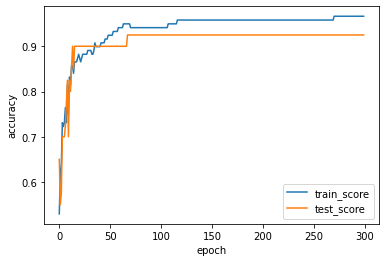

In [25]:
for _ in range(0, 300):
    # sc 모델에 조금씩 학습시키기 위해 partial_fit을 할 경우, 타겟 값에 대해서 같이 입력해야 함
    sc.partial_fit(train_scaled_X, train_Y, classes=classes)
    train_score.append(sc.score(train_scaled_X, train_Y))
    test_score.append(sc.score(test_scaled_X, test_Y))

import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.legend(['train_score', 'test_score'])
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

In [26]:
# 위의 결과에서 epoch가 약 80-100 정도에 성능이 좋았음

sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled_X, train_Y)


print("sc model's score'")
print("train's score= ", sc.score(train_scaled_X, train_Y))
print("test's score= ", sc.score(test_scaled_X, test_Y))

sc model's score'
train's score=  0.957983193277311
test's score=  0.925


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
